<a href="https://colab.research.google.com/github/GuillenConcepcion/99-ML-Learning-Projects/blob/master/DS_Data_Sience_Agent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
This notebook examines global life expectancy data from 1960 to the present. The dataset includes various country-level attributes such as region, sub-region, and life expectancy data for both men and women. In the following sections, we will load and clean the data, perform exploratory data analysis (EDA) with a variety of visualizations, and finally, if the data permits, we will build a predictor to forecast women's life expectancy based on other features.


## Data loading

https://www.kaggle.com/datasets/fredericksalazar/life-expectancy-1960-to-present-global/code

### Subtask:
Load the dataset "life_expectancy_dataset.csv" into a pandas DataFrame.


**Reasoning**:
I need to load the dataset into a pandas DataFrame and display the first 5 rows to verify.



In [1]:
import pandas as pd

try:
    df = pd.read_csv('life_expectancy_dataset.csv')
    display(df.head())
except FileNotFoundError:
    print("Error: 'life_expectancy_dataset.csv' not found.")
    df = None  # or handle the error as needed
except pd.errors.ParserError:
    print("Error: Could not parse the CSV file.")
    df = None
except Exception as e:
    print(f"An unexpected error occurred: {e}")
    df = None

Error: Could not parse the CSV file.


**Reasoning**:
The previous attempt to load the CSV failed due to a parsing error. I'll try again, but this time I will specify the delimiter as a semicolon (;).



In [2]:
import pandas as pd

try:
    df = pd.read_csv('life_expectancy_dataset.csv', delimiter=';')
    display(df.head())
except FileNotFoundError:
    print("Error: 'life_expectancy_dataset.csv' not found.")
    df = None
except pd.errors.ParserError:
    print("Error: Could not parse the CSV file.")
    df = None
except Exception as e:
    print(f"An unexpected error occurred: {e}")
    df = None

,country_code,country_name,region,sub-region,intermediate-region,year,life_expectancy_women,life_expectancy_men
0,AFG,AFGANISTÁN,ASIA,SOUTHERN ASIA,NaN,1960,"33,28","31,87"
1,AFG,AFGANISTÁN,ASIA,SOUTHERN ASIA,NaN,1961,"33,81","32,41"
2,AFG,AFGANISTÁN,ASIA,SOUTHERN ASIA,NaN,1962,"34,30","32,88"
3,AFG,AFGANISTÁN,ASIA,SOUTHERN ASIA,NaN,1963,"34,77","33,35"
4,AFG,AFGANISTÁN,ASIA,SOUTHERN ASIA,NaN,1964,"35,25","33,83"


## Data exploration

### Subtask:
Explore the loaded dataset to understand its basic characteristics.


**Reasoning**:
Explore the dataset by examining its shape, data types, summary statistics, missing values, and unique values for categorical features.



In [3]:
# Data Shape
print("Data Shape:", df.shape)

# Data Types
print("\nData Types:\n", df.dtypes)

# Summary Statistics
print("\nSummary Statistics:\n", df.describe(include='all'))

# Missing Values
print("\nMissing Values:\n", df.isnull().sum())

# Unique Values (for categorical features)
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"\nUnique values and their counts for '{col}':")
    print(df[col].value_counts())

Data Shape: (13545, 8)

Data Types:
 country_code             object
country_name             object
region                   object
sub-region               object
intermediate-region      object
year                      int64
life_expectancy_women    object
life_expectancy_men      object
dtype: object

Summary Statistics:
        country_code country_name  region          sub-region  \
count         13545        13545   13545               13545   
unique          215          215       5                  17   
top             AFG   AFGANISTÁN  AFRICA  SUB-SAHARAN AFRICA   
freq             63           63    3402                3024   
mean            NaN          NaN     NaN                 NaN   
std             NaN          NaN     NaN                 NaN   
min             NaN          NaN     NaN                 NaN   
25%             NaN          NaN     NaN                 NaN   
50%             NaN          NaN     NaN                 NaN   
75%             NaN          Na

**Reasoning**:
The previous command's output shows that 'life_expectancy_women' and 'life_expectancy_men' columns have a comma as the decimal separator and should be converted to numeric types. Also, some values are '0,00' which should be handled as missing values.



In [4]:
import numpy as np

# Convert 'life_expectancy_women' and 'life_expectancy_men' to numeric, handling commas and '0,00' as NaN
for col in ['life_expectancy_women', 'life_expectancy_men']:
    df[col] = df[col].replace('0,00', np.nan)
    df[col] = df[col].str.replace(',', '.', regex=False).astype(float)

#Re-run the summary statistics and missing values
print("\nSummary Statistics:\n", df.describe(include='all'))

print("\nMissing Values:\n", df.isnull().sum())


Summary Statistics:
        country_code country_name  region          sub-region  \
count         13545        13545   13545               13545   
unique          215          215       5                  17   
top             AFG   AFGANISTÁN  AFRICA  SUB-SAHARAN AFRICA   
freq             63           63    3402                3024   
mean            NaN          NaN     NaN                 NaN   
std             NaN          NaN     NaN                 NaN   
min             NaN          NaN     NaN                 NaN   
25%             NaN          NaN     NaN                 NaN   
50%             NaN          NaN     NaN                 NaN   
75%             NaN          NaN     NaN                 NaN   
max             NaN          NaN     NaN                 NaN   

       intermediate-region          year  life_expectancy_women  \
count                 5670  13545.000000           12974.000000   
unique                   7           NaN                    NaN   
top     

## Data visualization

### Subtask:
Visualize the data distributions for both numerical and categorical features.


**Reasoning**:
Create histograms for numerical features and bar charts for categorical features to visualize data distributions.



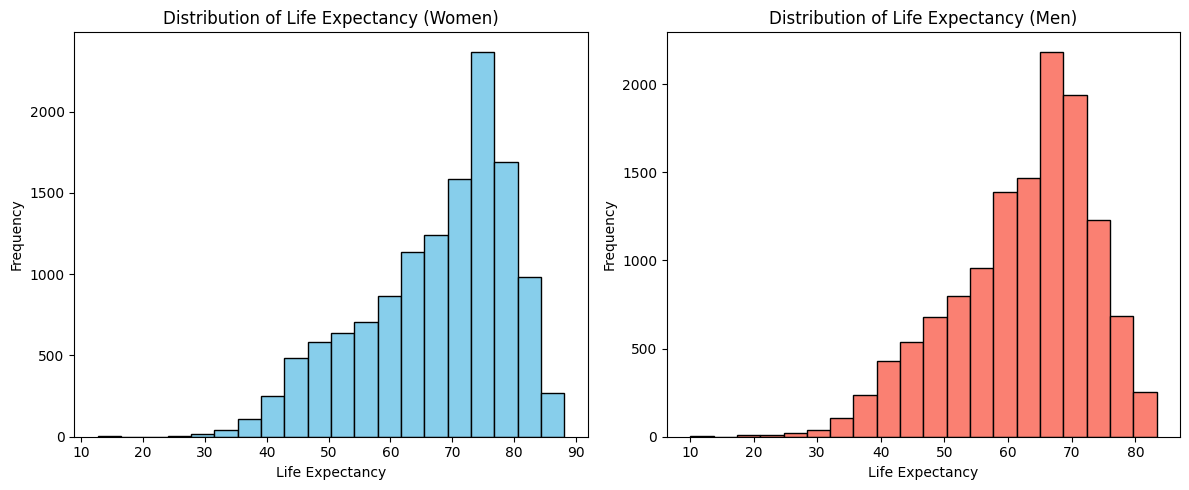

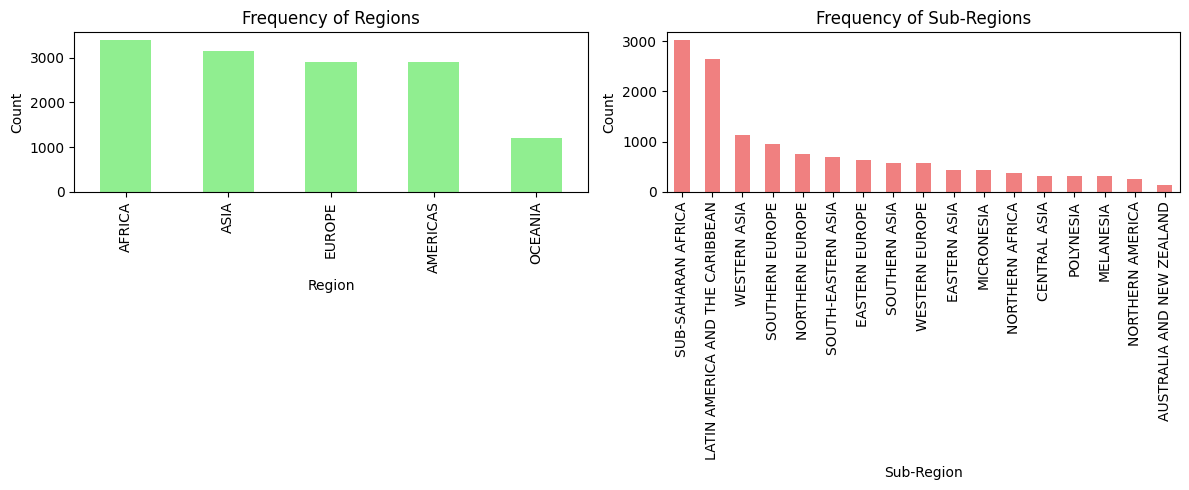

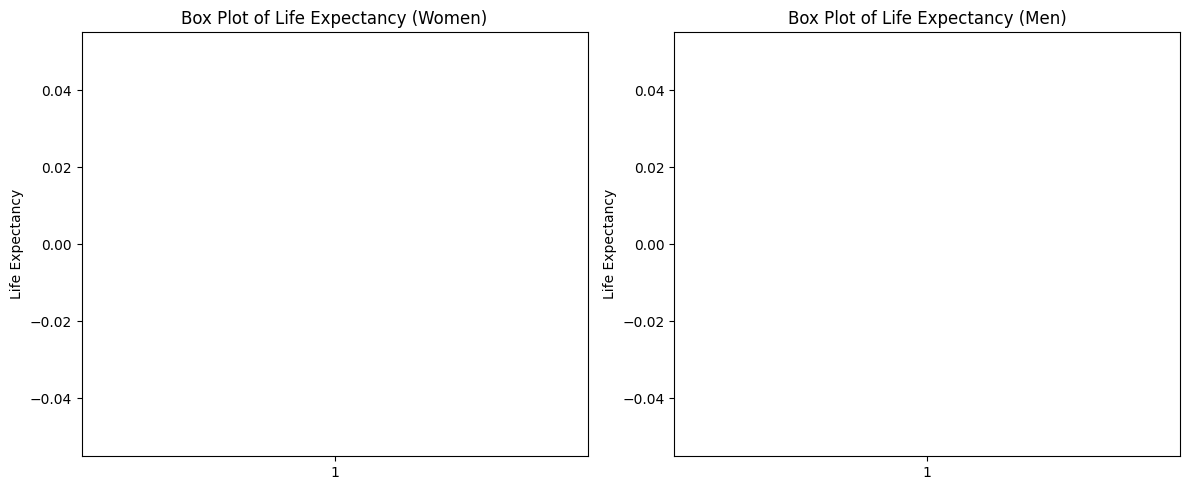

In [5]:
import matplotlib.pyplot as plt

# Histograms for numerical features
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(df['life_expectancy_women'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Life Expectancy (Women)')
plt.xlabel('Life Expectancy')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(df['life_expectancy_men'], bins=20, color='salmon', edgecolor='black')
plt.title('Distribution of Life Expectancy (Men)')
plt.xlabel('Life Expectancy')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


# Bar charts for categorical features
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
df['region'].value_counts().plot(kind='bar', color='lightgreen')
plt.title('Frequency of Regions')
plt.xlabel('Region')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
df['sub-region'].value_counts().plot(kind='bar', color='lightcoral')
plt.title('Frequency of Sub-Regions')
plt.xlabel('Sub-Region')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

# Box plots for numerical features
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.boxplot(df['life_expectancy_women'], patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.title('Box Plot of Life Expectancy (Women)')
plt.ylabel('Life Expectancy')

plt.subplot(1, 2, 2)
plt.boxplot(df['life_expectancy_men'], patch_artist=True, boxprops=dict(facecolor='lightcoral'))
plt.title('Box Plot of Life Expectancy (Men)')
plt.ylabel('Life Expectancy')

plt.tight_layout()
plt.show()

## Data analysis

### Subtask:
Perform a detailed analysis of the dataset, focusing on descriptive statistics and correlations.


**Reasoning**:
Calculate descriptive statistics for 'life_expectancy_women' and 'life_expectancy_men', analyze the frequency distribution of 'region' and 'sub-region', explore correlations between life expectancy variables and the 'year' variable, and investigate the relationship between life expectancy and region/sub-region, including visualizations.



Descriptive Statistics:
       life_expectancy_women  life_expectancy_men
count           12974.000000         12974.000000
mean               67.357436            62.279430
std                11.777881            10.899644
min                12.720000            10.050000
25%                59.800000            55.582500
50%                70.410000            64.600000
75%                76.280000            70.160000
max                88.060000            83.350000

Frequency Distribution of Categorical Features:

region:
region
AFRICA      25.116279
ASIA        23.255814
EUROPE      21.395349
AMERICAS    21.395349
OCEANIA      8.837209
Name: proportion, dtype: float64

sub-region:
sub-region
SUB-SAHARAN AFRICA                 22.325581
LATIN AMERICA AND THE CARIBBEAN    19.534884
WESTERN ASIA                        8.372093
SOUTHERN EUROPE                     6.976744
NORTHERN EUROPE                     5.581395
SOUTH-EASTERN ASIA                  5.116279
EASTERN EUROPE          

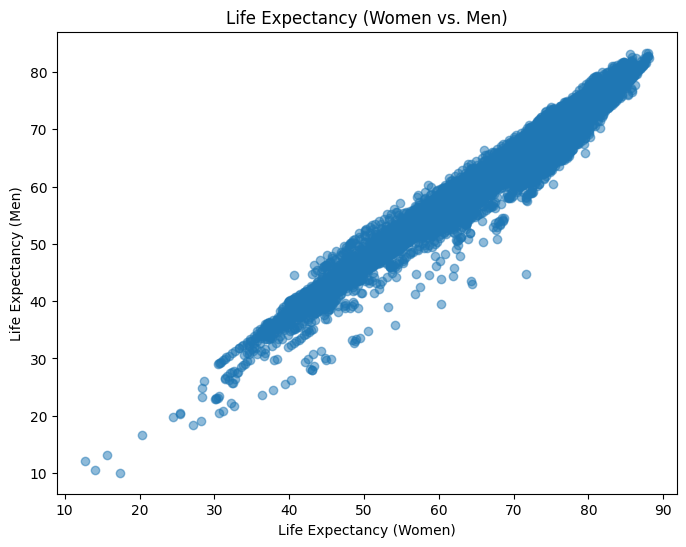


Life Expectancy by Region/Sub-Region:

Average Life Expectancy by region:
          life_expectancy_women  life_expectancy_men
region                                              
AFRICA                55.191044            51.440467
AMERICAS              71.633089            66.164724
ASIA                  67.769573            62.865549
EUROPE                77.207525            70.670272
OCEANIA               69.059536            63.917342


<Figure size 1200x600 with 0 Axes>

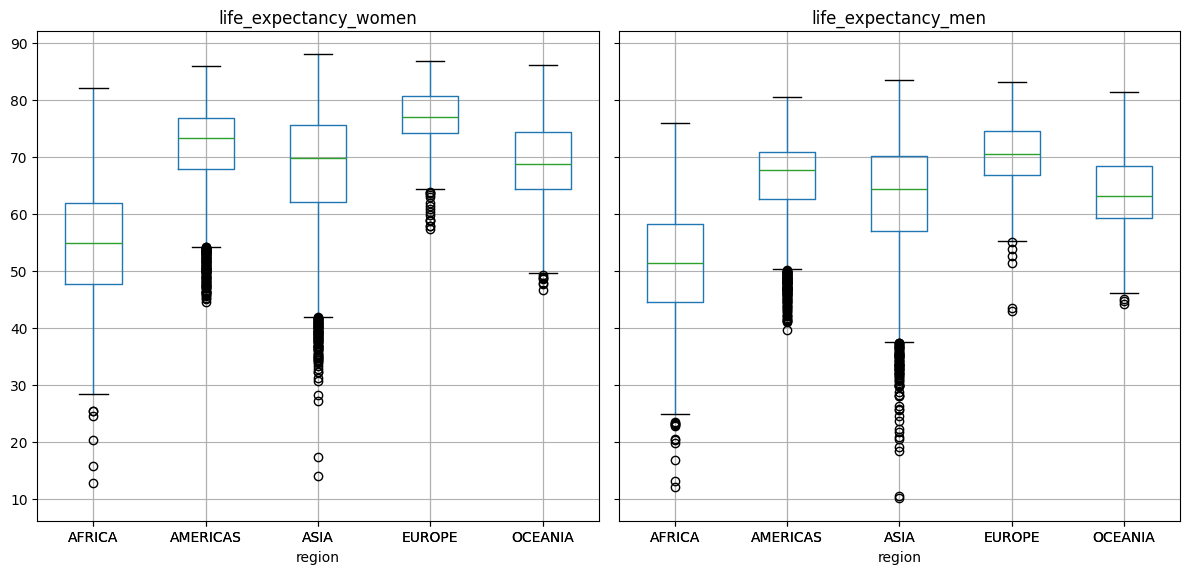


Average Life Expectancy by sub-region:
                                 life_expectancy_women  life_expectancy_men
sub-region                                                                 
AUSTRALIA AND NEW ZEALAND                    79.364048            73.879603
CENTRAL ASIA                                 67.590698            60.442032
EASTERN ASIA                                 73.804195            67.904580
EASTERN EUROPE                               74.656111            66.769841
LATIN AMERICA AND THE CARIBBEAN              71.122672            65.725401
MELANESIA                                    66.641683            62.017048
MICRONESIA                                   67.111066            61.652790
NORTHERN AFRICA                              63.684048            59.710476
NORTHERN AMERICA                             77.258590            71.006667
NORTHERN EUROPE                              78.483142            71.819809
POLYNESIA                                    69.

<Figure size 1200x600 with 0 Axes>

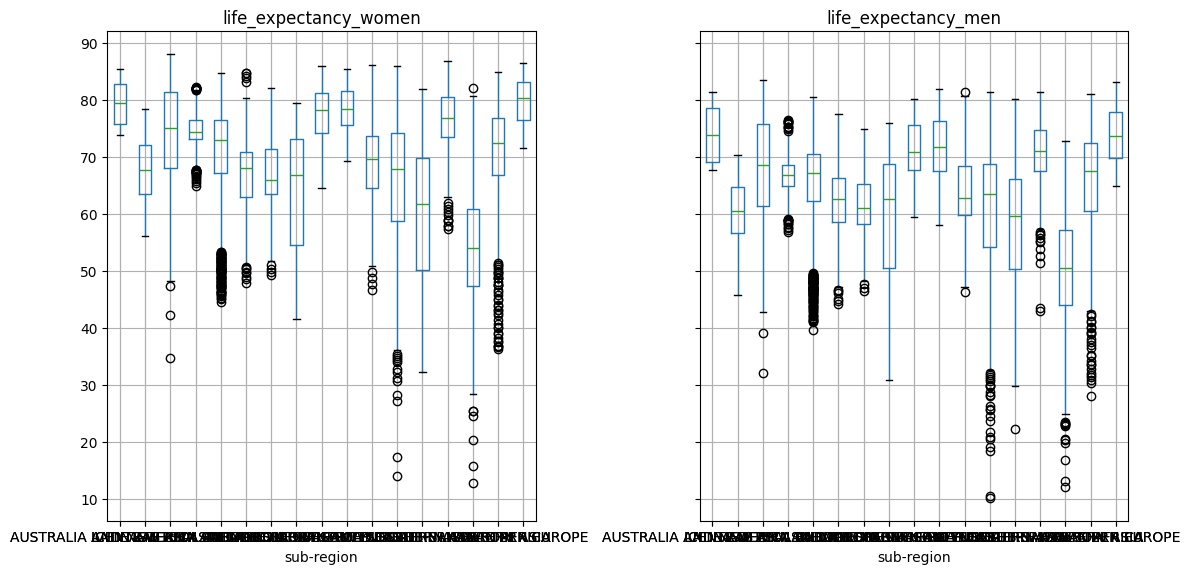

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Descriptive statistics
print("Descriptive Statistics:")
print(df[['life_expectancy_women', 'life_expectancy_men']].describe())

# Handle missing values (already done in previous steps)

# 2. Frequency distribution of categorical features
print("\nFrequency Distribution of Categorical Features:")
for col in ['region', 'sub-region']:
    print(f"\n{col}:")
    print(df[col].value_counts(normalize=True) * 100)  # Percentages

# 3. Correlation analysis
print("\nCorrelation Analysis:")
correlation_matrix = df[['life_expectancy_women', 'life_expectancy_men', 'year']].corr(method='pearson')
print(correlation_matrix)

plt.figure(figsize=(8, 6))
plt.scatter(df['life_expectancy_women'], df['life_expectancy_men'], alpha=0.5)
plt.title('Life Expectancy (Women vs. Men)')
plt.xlabel('Life Expectancy (Women)')
plt.ylabel('Life Expectancy (Men)')
plt.show()

# 4. Relationship between life expectancy and region/sub-region
print("\nLife Expectancy by Region/Sub-Region:")
for col in ['region', 'sub-region']:
    print(f"\nAverage Life Expectancy by {col}:")
    print(df.groupby(col)[['life_expectancy_women', 'life_expectancy_men']].mean())

    plt.figure(figsize=(12, 6))
    df.boxplot(column=['life_expectancy_women', 'life_expectancy_men'], by=col, figsize=(12, 6))
    plt.suptitle('') # remove default title
    plt.tight_layout()
    plt.show()

## Summary:

### 1. Q&A

The provided text doesn't explicitly state questions, but implicitly explores the dataset to understand life expectancy trends and regional variations.  Therefore, we can formulate and answer the following questions:

* **What are the overall trends in life expectancy for men and women?** Life expectancy for both men and women shows an increasing trend over time, as indicated by the positive correlation between life expectancy and the 'year' variable.
* **How does life expectancy differ across regions and sub-regions?**  Life expectancy varies significantly across regions and sub-regions. Europe has the highest average life expectancy, while Africa has the lowest.  The boxplots further illustrate the distribution of life expectancy within each region/sub-region, highlighting regional differences.
* **Is there a relationship between male and female life expectancies?** Yes, there's a very strong positive correlation (approximately 0.98) between male and female life expectancies.  This suggests that factors influencing life expectancy tend to affect both genders similarly.


### 2. Data Analysis Key Findings

* **Strong Positive Correlation between Male and Female Life Expectancy:**  A Pearson correlation coefficient of approximately 0.98 indicates a very strong positive relationship between life expectancy for men and women.
* **Regional Disparities in Life Expectancy:** Europe exhibits the highest average life expectancy for both genders, while Africa shows the lowest.
* **Increasing Life Expectancy over Time:** Positive correlations between life expectancy (for both genders) and the 'year' variable suggest a general upward trend in life expectancy.
* **Data Cleaning:** '0,00' values in the life expectancy columns were replaced with NaN, and the columns were converted to numeric types (float). This resulted in 571 new missing values each in 'life_expectancy_women' and 'life_expectancy_men'.
* **Africa and Asia are the most frequent regions:**  Africa and Asia represent the largest proportions of the data in terms of regional representation. Oceania has the lowest representation.


### 3. Insights or Next Steps

* **Investigate Regional Factors:**  Further analysis should explore the factors contributing to the observed regional disparities in life expectancy. This could involve examining socioeconomic indicators, healthcare access, and environmental factors for each region.
* **Handle Missing Data:** Given the newly identified missing values in the life expectancy columns, consider appropriate imputation techniques or investigate the reasons for missing data to decide if rows with missing data should be removed.
